In [1]:
import numpy as np
import random as rn


from matplotlib import pyplot as plt
from pprint import pprint as pp
from math import floor

In [55]:
### GA
POPULATION_SIZE = 6
CHROMESOME_SIZE = 4
MUTATION_RATE = 0.001  # Usually between  0.001 and 0.01.
CROSSOVER_RATE = 0.7
EPOCHS = 200
# PROMOTION_RATE = POPULATION_SIZE * 0.25
# STANDARD_FITNESS = 0.01
CHOICES_TEST = [0,1]

class Chromosome:

    def __init__(self, size, chromosome = []):
        self.size = size
        if len(chromosome) > 0:
            self.chromosome = chromosome
        else: 
            self.chromosome = self.random_binary_chromosome(size)

    def fitness(self):
        return self.fitness_test()
    
    def fitness_test(self):
        a = self.chromosome
        x = 8 * a[0] + 4 * a[1] + 2 * a[2] + 1 * a[3]
        return  15*x - x**2
    
#     def fitness_test(self):
#         a = self.chromosome
#         x = 8 * a[0] + 4 * a[1] + 2 * a[2] + 1 * a[3]
#         return  15*x - x**2

    def crossover(self, other, x):
        n1 = np.concatenate((self.chromosome[:x], other.chromosome[x:]))
        n2 = np.concatenate((other.chromosome[:x], self.chromosome[x:]))
        return Chromosome(self.size, n1), Chromosome(self.size, n2)

    def mutate(self, i):
        choices = CHOICES_TEST[:]
        choices.remove(self.chromosome[i])
        self.chromosome[i] = rn.choice(choices)
        
    def random_binary_chromosome(self, size):
        return np.array([rn.choice(CHOICES_TEST) for i in range(size)])
    
class Genetic:
    # 1 Initial population
    def initial_population(self):
        self.population = [Chromosome(CHROMESOME_SIZE) for i in range(POPULATION_SIZE)]

    # 2 Fitness function


    # 3 Selection
    def selection(self):
        total = 0
        wheel= []
        for chrom in self.population:
            total += chrom.fitness()
#             print('chromosome: ', chrom.chromosome)
#             print('fitess: ', chrom.fitness()) 
            wheel.append(total)

#         wheel = [total += chrom.fitness() for chrom in self.population]
        assert total > 0, 'total is not > 0' 
#         pp(wheel)
        
        
        candidates = []
        for dc in range(len(self.population)):
            prev = 0
            r = rn.uniform(0, total)
            for i in range(len(wheel)):
                if prev <= r and r <= wheel[i]:
                    candidates.append(self.population[i])
                    break
                prev = wheel[i]
        return self.crossover_and_mutate(candidates)

    def crossover_and_mutate(self, candidates):
        # 4 Crossover
        parents = []
        new_population = []
        for i in candidates:
            if rn.random() < CROSSOVER_RATE:
                parents.append(i)
            else:
                new_population.append(i)

        n = len(parents)
        for i in range(n):
            x = rn.randint(1, CHROMESOME_SIZE - 1)
            new_population.extend(parents[i].crossover(parents[i % n], x))
            
        # 5 Mutation
        total_genes = CHROMESOME_SIZE * POPULATION_SIZE
        nr_of_mutations = int(round(total_genes * MUTATION_RATE))
        for _ in range(nr_of_mutations):
            r = rn.randint(0, total_genes - 1)
            chrom_index = floor(r / CHROMESOME_SIZE)
            gene_index = r % CHROMESOME_SIZE
            a = new_population[chrom_index]
            a.mutate(gene_index)

        self.population = new_population
        return new_population

    def chromString(self, arr):
        for i in arr:
            print(i.toString())

    def find_best(self):
        best_fitness = 0
        best_chrom = None
        for chrom in self.population:
            chrom_fitness = chrom.fitness() 
            if chrom_fitness > best_fitness:
                best_fitness = chrom_fitness
                best_chrom = chrom
        return best_chrom
    
    def approximate(self, epochs=32):
#         evolution = [self.selection() for _ in range(epochs)]
        evolution = []
        counter = 0
        for _ in range(epochs):
            counter += 1
            evolution.append(self.selection())
            print('\r Epoch: {}/{}'.format(counter, epochs), end='')
        return self.find_best(), evolution

In [60]:
# TODO: runtime per epoch exponentially increases, check out why
# Plot mean fitness over epochs
gen = Genetic()
gen.initial_population()
best, evo = gen.approximate(epochs=10)
best.fitness()

/r Epoch: 1/10/r Epoch: 2/10/r Epoch: 3/10/r Epoch: 4/10/r Epoch: 5/10/r Epoch: 6/10/r Epoch: 7/10/r Epoch: 8/10/r Epoch: 9/10/r Epoch: 10/10

50

In [6]:
gen = Genetic()
gen.initial_population()
for i in gen.population:
    pp(i.chromosome)
for i in gen.selection():
    pp(i.chromosome)
    pp(i.fitness())
for i in gen.selection():
    pp(sel)
    pp(i.chromosome)
    pp(i.fitness())
# gen.selection()

array([0, 1, 0, 1])
array([0, 0, 0, 0])
array([1, 1, 1, 1])
array([1, 0, 1, 0])
array([0, 1, 1, 0])
array([0, 0, 1, 1])
chromosome:  [0 1 0 1]
fitess:  50
chromosome:  [0 0 0 0]
fitess:  0
chromosome:  [1 1 1 1]
fitess:  0
chromosome:  [1 0 1 0]
fitess:  50
chromosome:  [0 1 1 0]
fitess:  54
chromosome:  [0 0 1 1]
fitess:  36
[50, 50, 50, 100, 154, 190]


AttributeError: 'tuple' object has no attribute 'chromosome'

[0, 14, 26, 36, 44, 50, 54, 56, 56, 54, 50, 44, 36, 26, 14]

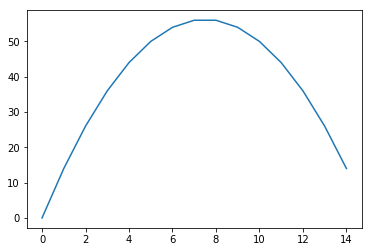

In [26]:
x = 3
15*x - x**2
l = [15*x - x**2 for x in range(15)]
plt.plot(l)
l

In [94]:
# testing example from book: page 224
# optimize 15x - x^2

ch1 = Chromosome(4)
ch2 = Chromosome(4)
pp(ch1.chromosome)
pp(ch2.chromosome)
c1,c2 = ch1.crossover(ch2, 2)
pp(c1.chromosome)
pp(c2.chromosome)

array([1, 0, 0, 1])
array([0, 1, 1, 1])
array([1, 0, 1, 1])
array([0, 1, 0, 1])
